# Predicting heart disease using machine learning

This notebook looks into using various Pyhton-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart diseaese based on their medical attributes.

We are going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features 
5. Modelling 
6. Experimentation 


## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart diseases?

## 2. Data 

The original data came from Cleavland data from the UCI Machine Learning Repository. 

There is also a version of it available on Kaggle: 
https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?select=heart_cleveland_upload.csv

Original dataset from uci: https://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project. 

## 4. Features 

This is where you'll get different information about each of the features in your data.

**Create a data dictionary**

There are 13 attributes

age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
condition: 0 = no disease, 1 = disease



## Preparing the tools

We are going to use pandas, Matplotlib and NumPy for data analysis and manipulation



In [1]:
#Import all the tools we need

#Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#We want our plot appear inside our notebook
%matplotlib inline 

#Models from sklearn, check: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Load data 

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#Let's find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

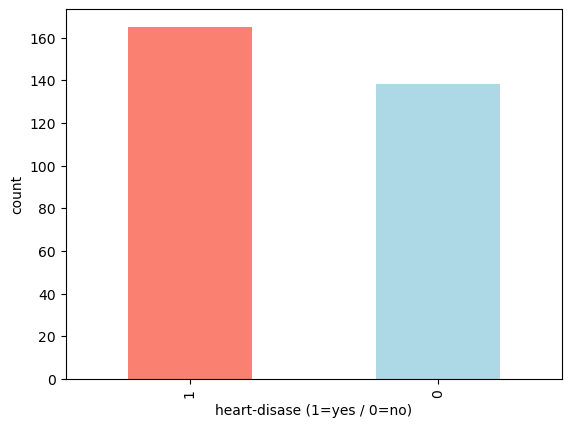

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"], xlabel="heart-disase (1=yes / 0=no)", ylabel="count");

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Are there missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency to Sex

In [10]:
df.sex.value_counts() #1=male, 0=female

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

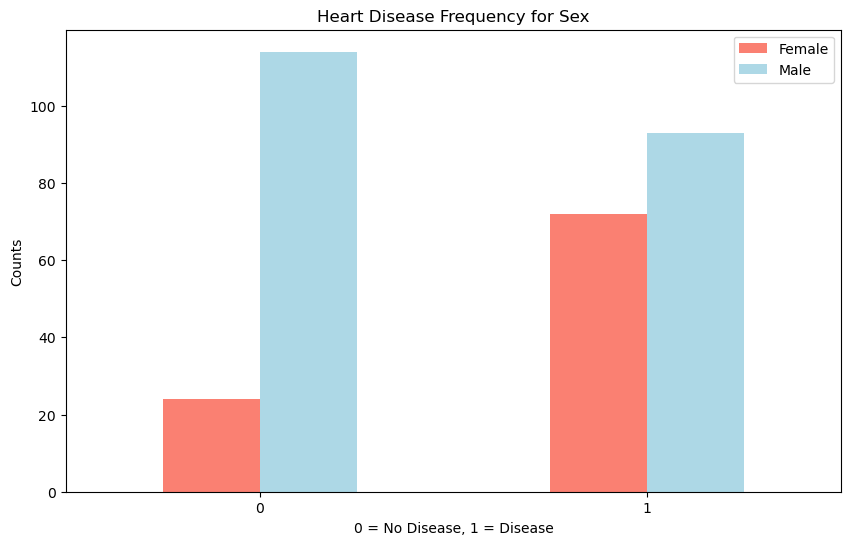

In [12]:
# Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["Salmon", "lightblue"]);

plt.title("Heart Disease Frequency for Sex")

plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Counts")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0)

In [13]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

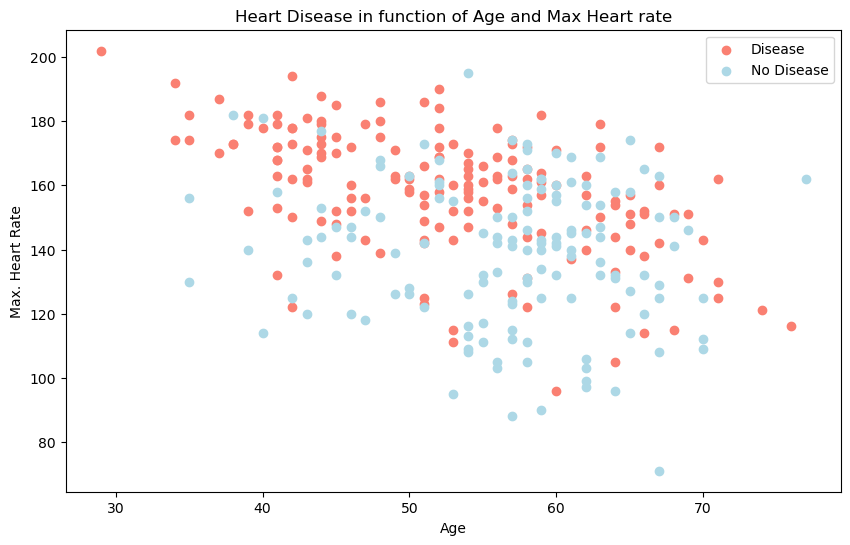

In [14]:
#Create another figure

plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="Salmon")

#Scatter with negative examples


plt.scatter(df.age[df["target"]==0],
           df.thalach[df["target"]==0],
           color="lightblue");

## Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Disease", "No Disease"])

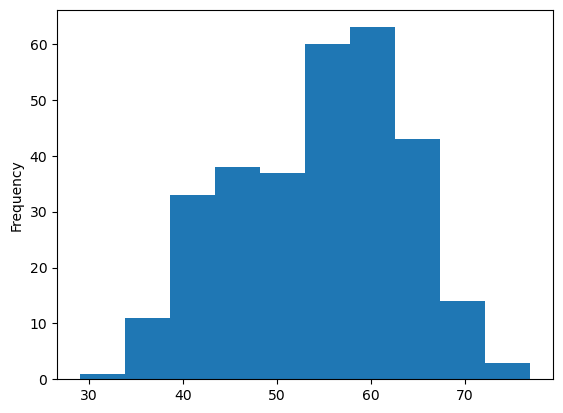

In [15]:
# Check the distribution of the age column with a histogram

df.age.plot.hist();

## Heart Disease Frequency per Chestpain type


cp: chest pain type
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


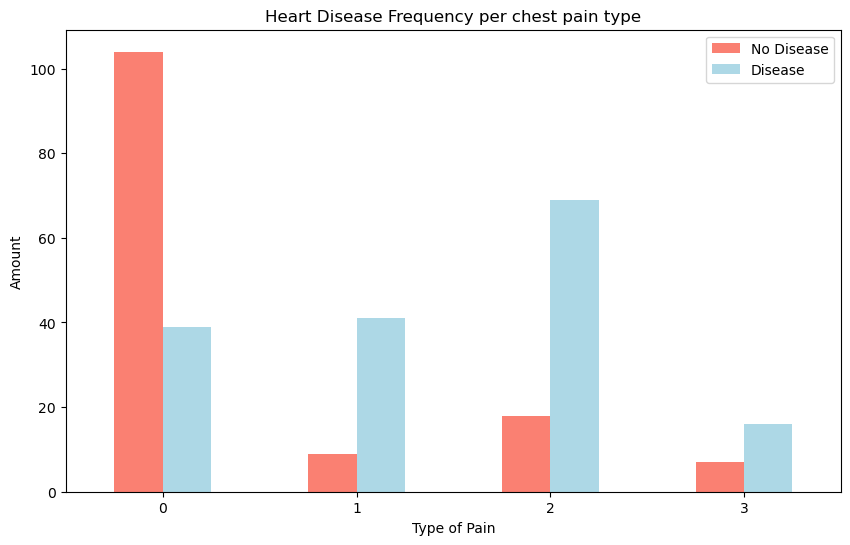

In [17]:
# Make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["Salmon", "lightblue"])

plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Type of Pain")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [18]:
# Make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


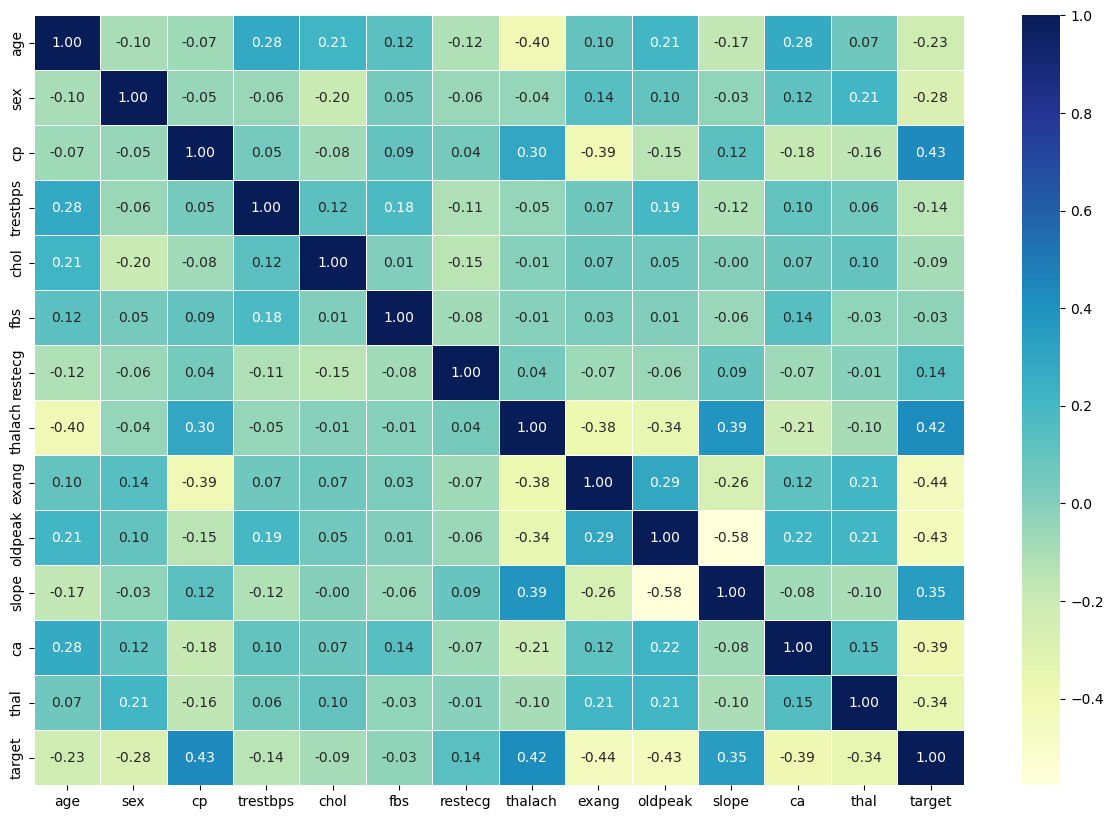

In [19]:
# Let's make our correlation matrix prettier

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
    

## 5. Modelling 



In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split data into X and y

X = df.drop("target", axis=1)
y = df["target"]

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [58]:
#Randomization of data
np.random.seed(42)
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we wil test it (use the patterns) on the test set.

We're going to try 3 different machine learning models

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [59]:
# Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(n_neighbors=3),
         "Random Forest": RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of differenct scikit-learn machine learning model
    X_train: Training data, no labels
    X_test: Testing data, no labels
    y_train: Training labels
    y_test: test labels
    """
    #Set random seed
    np.random.seed(42)
    #Make a dictionary to model scores
    models_scores = {}
    #Loop through model dictionary
    for name, model in models.items():
        model.fit(X_train, y_train)
        models_scores[name] = model.score(X_test, y_test)
    return models_scores

In [60]:
models_scores = fit_and_score(models=models,
                            X_train=X_train,
                            y_train=y_train,
                            X_test=X_test,
                            y_test=y_test)

C:\Users\Franz\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
models_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8360655737704918}

### Model Comparison

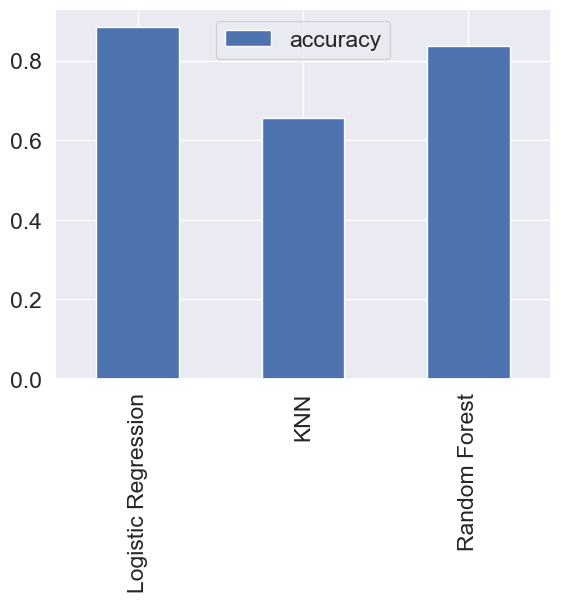

In [62]:
model_compare = pd.DataFrame(models_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model and we know the model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning 
* Feature importance
* Confusion Matrix
* Cross Validation 
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the curve (AOC)


### Hyperparameter Tuning (by Hand)

In [63]:
#Let's tune KNN

training_scores = []
test_scores = []

# Create a list of different values for n_neighbors

neighbors = range(1, 21)

#Set up KNN instance
knn = KNeighborsClassifier()

#Loop through differen n-neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i) 
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training score list
    training_scores.append(knn.score(X_train, y_train))
    
    #Update the test score list
    test_scores.append(knn.score(X_test, y_test))

In [64]:
training_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN Score on test data: 75.41%


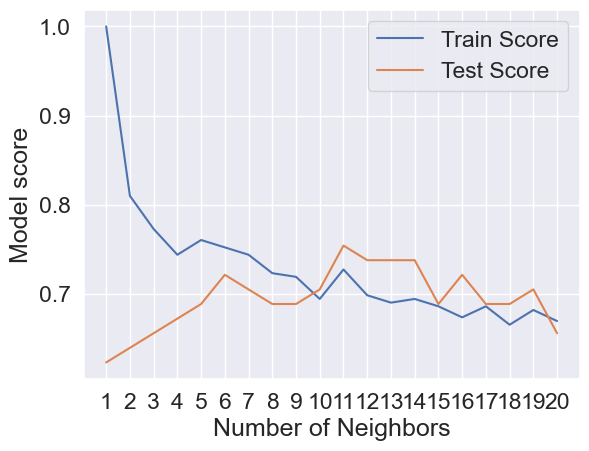

In [65]:
plt.plot(neighbors, training_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN Score on test data: {max(test_scores) * 100:.2f}%")

## Hyperparameter Tuning using RandomizedSearchCV


We're going to tune our 
* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV

In [66]:
# Create a Hyperparameter Grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

#Create a hyperparameter Grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split" : np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [67]:
#Tune Logistic Regression

np.random.seed(42)

#Set up random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid, 
                               cv=5,
                               n_iter=20, 
                               verbose=True)

#Fit random hyperparameter search model for logisticRegression 

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [68]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [69]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression, let's do the same for RandomForestClassifier()

In [70]:
#Setup random Seed

np.random.seed(42)

#Setup random hyperparameter search for RandForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
#Fit to training data
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [71]:
#Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [72]:
# Evaluate the randomizedSearch RandomForestCLassifier Model /
rs_rf.score(X_test, y_test)  
#Our model is a bit better after tuning the hyperparameters

0.8688524590163934

In [73]:
models_scores


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8360655737704918}

Reminder, we did 1. and 2. of Hyperparameter tuning: 
1. By Hand
2. RandomizedSearchCV
3. GridSearchCV

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression Model did very well, we will optimize it using GridSearchCV


In [74]:
#Different hyperparamters for our LogisticRegressionCV

log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression 

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

#Fit the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [75]:
# Check the best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [76]:
#Evaluate the grid search LogisticRegression Model
gs_log_reg.score(X_test, y_test) 

0.8852459016393442

In [77]:
models_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8360655737704918}

Turns out our optimized model is not better, nor worse than the initial model

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

To make comparisions and evaluate our trained model, first we need to make predicitons

In [78]:
#Make predicitons

y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [79]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

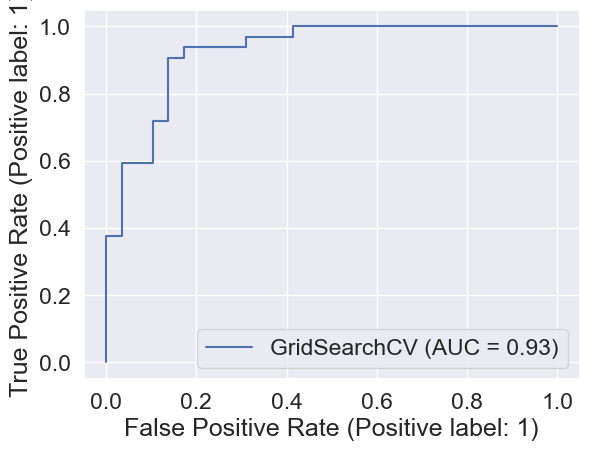

In [80]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

In [81]:
#Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


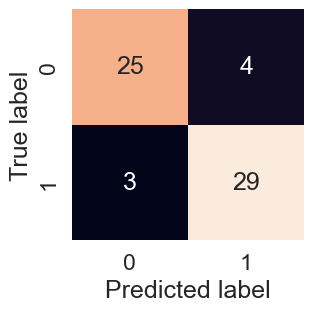

In [82]:
#Confusion matrix
plot_conf_mat(y_test, y_preds)

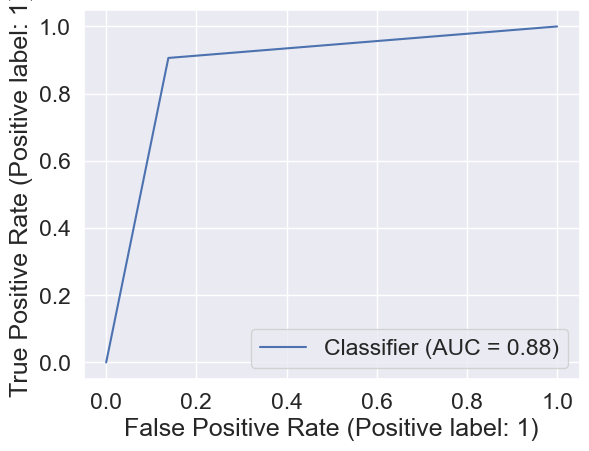

In [84]:
#ROC Curve from prediction 

RocCurveDisplay.from_predictions(y_test, y_preds)
plt.show()

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validation precision, recall and f1-score

In [85]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation 

We are going to calculate, accuracy,  precision, recall and f1 score of our model using cross-validation and to do so we'll be using cross_val_score().

In [86]:
# Check best hyperparameters 
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [87]:
# Create a new classifier with best parameters

clf = LogisticRegression(C=0.20433597178569418, 
                         solver="liblinear" )

In [94]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, 
                        X,
                        y,
                        cv=5,
                        scoring="accuracy").mean()
cv_acc


0.8446994535519124

In [95]:
#Cross-validated precision
cv_precision = cross_val_score(clf, 
                        X,
                        y,
                        cv=5,
                        scoring="precision").mean()
cv_precision


0.8207936507936507

In [97]:
#Cross-validated recall
cv_recall = cross_val_score(clf, 
                        X,
                        y,
                        cv=5,
                        scoring="recall").mean()
cv_recall


0.9212121212121213

In [98]:
#Cross-validated f1-score
cv_f1 = cross_val_score(clf, 
                        X,
                        y,
                        cv=5,
                        scoring="f1").mean()
cv_f1


0.8673007976269721

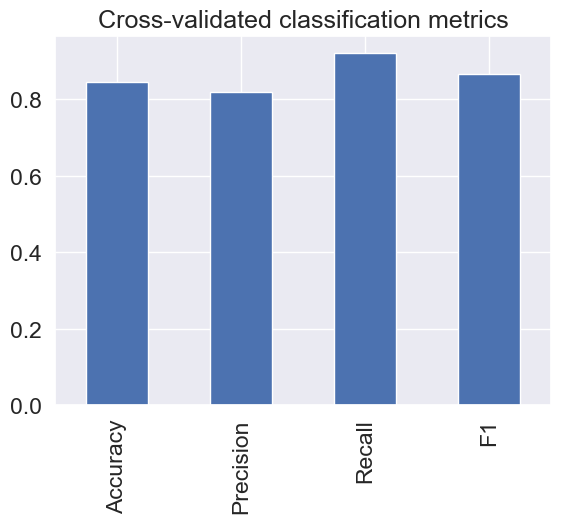

In [101]:
#Visualize our cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

### Feature Importance
Feature importance is a nother asking, "which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(Model Name) feature importance".

Let's find the feature importance for our LogisticRegression model....

In [102]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
#Fit an instance of LogisticRegression

gs_log_reg.best_params_
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [105]:
#Check coef_

clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [106]:
# Match coef's of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

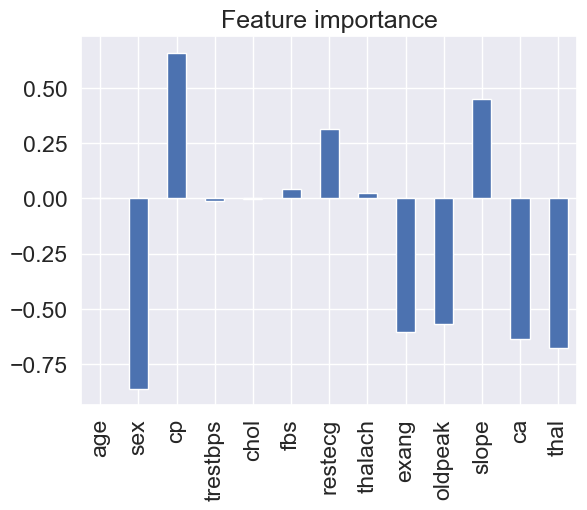

In [108]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title="Feature importance", legend=False);

In [109]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [110]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope: the slope of the peak exercise ST segment
* Value 0: upsloping
* Value 1: flat
* Value 2: downsloping

## 6. Experimentaion

If you haven't hit your evaluation metric yet... ask yourself....
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough, how would you export your model to others